In [1]:
from sympy import *
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.integrate as integrate
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [196]:
df = pd.read_csv('mu_pantheon.csv')
df.columns = ['redshift', 'mu', 'error']
z_obs = np.array(df.redshift)
z_exp = np.array(np.linspace(0, 2.6, 2601))
mu_obs = np.array(df.mu)
yerr = np.array(df.error)
Omega_m = Symbol('Omega_m')
Omega_k = Symbol('Omega_k')
nOm = 51
nOl = 75
Omega_m = np.linspace(.2, .4, num=nOm)
#Omega_k = np.linspace(-0.1, 0.1, num=nOk)
Omega_l = np.linspace(.5, .9, num = nOl)
H_0 = 70*10**3
c = 3*10**8
cov = np.load('Cov.npy')

In [187]:
covinv = np.linalg.inv(cov)

In [188]:
DH = c/H_0
chi2 = np.zeros((nOm, nOl))
from scipy import interpolate

print (Omega_k)
print (Omega_m)

Omega_k
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


In [197]:
for il, Oml in enumerate(Omega_l):
    for im, Omm in enumerate(Omega_m):
        # print (Omm,Oml)
        Omk = 1 - Oml - Omm
        E = (Omm * (1+z_exp)**3 + Omk * (1+z_exp)**2 + Oml) **(0.5)
        DC = DH * integrate.cumtrapz((1/E), z_exp, initial = 0.0001)
        
        if (Omk < 0) :
            DM = DH * abs(Omk)**(-0.5) * np.sin(abs(Omk)**0.5 * DC / DH)
        elif (Omk > 0):
            DM = DH * Omk**(-0.5) * np.sinh(Omk**0.5 * DC / DH)
        else:
            DM = DC
        
        DL = (1 + z_exp) * DM
        mu_theory = 5 * np.log10(DL) + 25
        mu_int = interpolate.interp1d(z_exp, mu_theory)(z_obs)
        mat1 = np.array(mu_int - mu_obs)
        mat2 = mat1.transpose()
        
#         if Omk==0.1 and Omm == 0.25:
#             fig,ax = plt.subplots(1)
#             plt.plot(z_exp,mu_theory)
#             plt.errorbar(z_obs,mu_obs,yerr,ls='',marker='.')
#             plt.show()

        
        result1 = np.matmul(mat2, covinv)
        result2 = np.matmul(result1, mat1)
        chi2[im, il] = result2
# print(chi2)

In [193]:
print (np.shape(chi2),
    # chi2.argmin()
    chi2[1,2],
    Omega_m[1],
    Omega_k[2])

TypeError: 'Symbol' object is not subscriptable

In [ ]:
chi2

In [ ]:
# for ik, Omk in enumerate(Omega_k):
#     for im, Omm in enumerate(Omega_m):
#         if (Omk > 0):
#             E = (Omm * (1+z_exp)**3 + Omk * (1+z_exp)**2 + (1-(Omm + Omk))) ** (0.5)
#             DC = DH * integrate.cumtrapz((1/E), z_exp, initial = 0.0001)
#         DM = DH * Omk**(-0.5) * np.sinh(Omk**0.5 * DC / DH)
#         DL = (1+z_exp) * DM
#         mu_theory = 5 * np.log10(DL) + 25
#         mu_int = interpolate.interp1d(z_exp, mu_theory)(z_obs)
#         mat1 = np.array(mu_int - mu_obs)
#         mat2 = mat1.transpose()
#         result1 = np.matmul(mat2, covinv)
#         result2 = np.matmul(result1, mat1)
#         chi2[ik, im] = result2
        
#         elif (Omk < 0) :
#             E = (Omm * (1+z_exp)**3 + (Omk) * (1+z_exp)**2 + (1 - (Omm + (Omk)))) ** (0.5)
#             DC = DH * integrate.cumtrapz((1/E), z_exp, initial = 0.0001)
#             DM = DH * (Omk)**(-0.5) * np.sin((Omk)**0.5 * DC / DH)
#             DL = (1+z_exp) * DM
#             mu_theory = 5 * np.log10(dm) + 25
#             mu_int = interpolate.interp1d(z_exp, mu_theory)(z_obs)
#             mat1 = np.array(mu_int - mu_obs)
#             mat2 = mat1.transpose()
#             result1 = np.matmul(mat2, covinv)
#             result2 = np.matmul(result1, mat1)
#             chi2[ik, im] = result2
        
#         else :
#             E = (Omm * (1+z_exp)**3 + (1-Omm)) ** (0.5)
#             DC = DH * integrate.cumtrapz((1/E), z_exp, initial = 0.0001)
#             mu_theory = 5 * np.log10(DC) + 25
#             mu_int = interpolate.interp1d(z_exp, mu_theory)(z_obs)
#             mat1 = np.array(mu_int - mu_obs)
#             mat2 = mat1.transpose()
#             result1 = np.matmul(mat2, covinv)
#             result2 = np.matmul(result1, mat1)
#             chi2[ik, im] = result2
            
#         print (chi2)

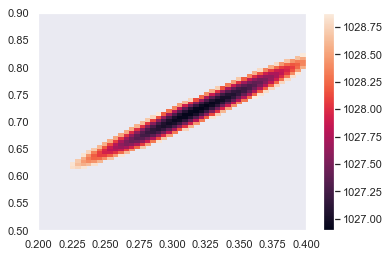

In [200]:
#Generate data for the plot

chi2min = np.nanmin(chi2)
x = Omega_m
y = Omega_l
# z = chi2
z = np.ma.masked_array(chi2,mask=chi2>chi2min+2)
#x Omegam and y Omega lambda
# Generate the plot
fig, ax = plt.subplots()
cmap = ax.pcolormesh(x, y, z.T)
fig.colorbar(cmap)
plt.show(fig)

In [194]:
z


masked_array(
  data=[[--, --, --, --, --, --, --, --, --, --, --, nan, nan, nan, nan],
        [--, --, --, --, --, --, --, --, --, --, --, --, nan, nan, nan],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, nan, nan],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, nan],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, 1027.8790021460925, --, --, --, --, --,
         --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, 1027.232372222003, --, --, --, --,
         --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, --, --, --, --, --, --, --, --, --, --, --, --, --],
        [--, --, 